# Importing Data & Libraries

In [27]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

appearances_df = pd.read_csv("C:/Users/ricca/Desktop/FootballData/appearances.csv")
players_df = pd.read_csv("C:/Users/ricca/Desktop/FootballData/players.csv")

# Data Preparation

In [28]:
appearances_df.shape

(1507351, 13)

In [29]:
appearances_df.head(10)

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
5,2234421_146889,2234421,146889,195,190,2012-07-05,Peter Ankersen,ELQ,1,0,0,0,90
6,2235539_28716,2235539,28716,282,7185,2012-07-05,Adi Adilovic,ELQ,0,0,0,0,90
7,2235539_69445,2235539,69445,282,19771,2012-07-05,Ivan Sesar,ELQ,1,0,0,1,90
8,2235545_19409,2235545,19409,317,200,2012-07-05,Willem Janssen,ELQ,0,0,0,0,45
9,2235545_30003,2235545,30003,317,317,2012-07-05,Wout Brama,ELQ,0,0,0,0,90


In [30]:
appearances_df = appearances_df.set_index('appearance_id')
appearances_df.head(10)

,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
appearance_id,,,,,,,,,,,,
2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
2234421_146889,2234421,146889,195,190,2012-07-05,Peter Ankersen,ELQ,1,0,0,0,90
2235539_28716,2235539,28716,282,7185,2012-07-05,Adi Adilovic,ELQ,0,0,0,0,90
2235539_69445,2235539,69445,282,19771,2012-07-05,Ivan Sesar,ELQ,1,0,0,1,90
2235545_19409,2235545,19409,317,200,2012-07-05,Willem Janssen,ELQ,0,0,0,0,45


In [31]:
appearances_df.loc[appearances_df.duplicated()]

,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
appearance_id,,,,,,,,,,,,


In [32]:
appearances_df.dtypes

game_id                    int64
player_id                  int64
player_club_id             int64
player_current_club_id     int64
date                      object
player_name               object
competition_id            object
yellow_cards               int64
red_cards                  int64
goals                      int64
assists                    int64
minutes_played             int64
dtype: object

In [33]:
appearances_df['date'] = pd.to_datetime(appearances_df['date'])
appearances_df.dtypes

game_id                            int64
player_id                          int64
player_club_id                     int64
player_current_club_id             int64
date                      datetime64[ns]
player_name                       object
competition_id                    object
yellow_cards                       int64
red_cards                          int64
goals                              int64
assists                            int64
minutes_played                     int64
dtype: object

# Data Analysis & Visualization

Media di minutes_played: 69.65


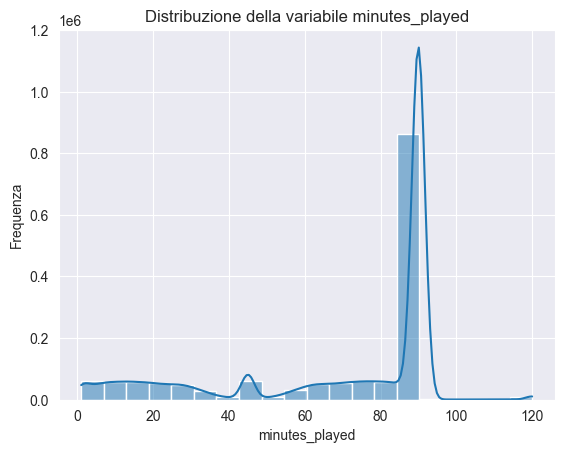

In [35]:
df = appearances_df
var = 'minutes_played'

mean_value = df[var].mean()
print(f"Media di {var}: {mean_value:.2f}")

sns.histplot(data=df, x=var, kde=True, bins=20)
plt.title(f'Distribuzione della variabile {var}')
plt.xlabel(f'{var}')
plt.ylabel('Frequenza')
plt.show()

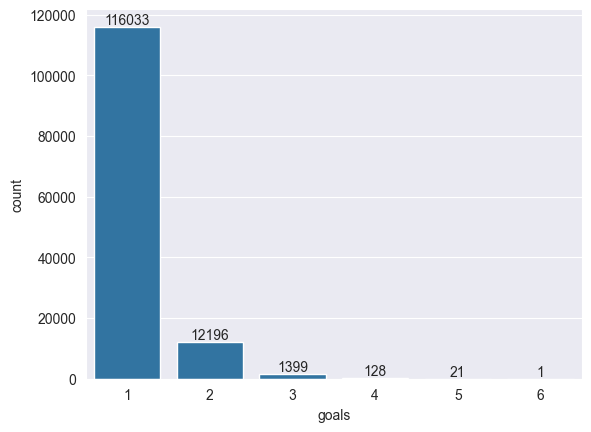

In [36]:
# distribuzione del numero di goal segnati da un giocatore in una singola partita
goal_counts = appearances_df.query('goals >= 1')['goals'].value_counts()

sns.countplot(data=appearances_df.query('goals >= 1'), x='goals')

for i, count in enumerate(goal_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
    
plt.show()

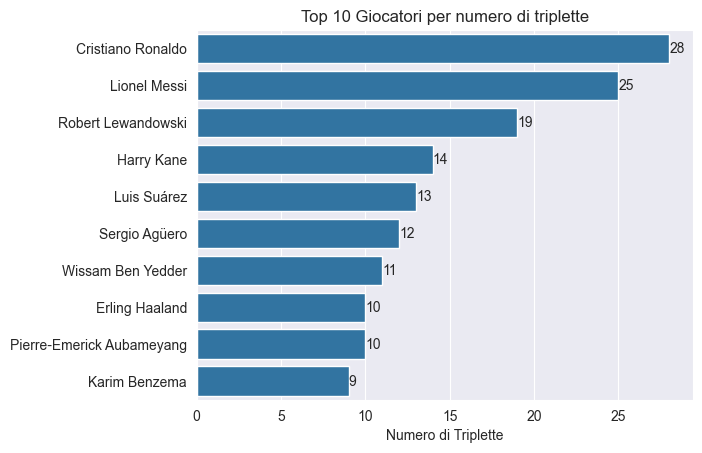

In [37]:
# giocatori con il maggior numero di triplette
hat_tricks = appearances_df.query('goals == 3')['player_id'].value_counts().head(10)
hat_tricks_df = pd.DataFrame({'player_id': hat_tricks.index, 'hat_tricks_count': hat_tricks.values})

merged_df = pd.merge(hat_tricks_df, players_df, on='player_id')


sns.barplot(data=merged_df, y='name', x='hat_tricks_count')

for index, value in enumerate(merged_df['hat_tricks_count']):
    plt.text(value, index, str(value), ha='left', va='center')

plt.title('Top 10 Giocatori per numero di triplette')
plt.xlabel('Numero di Triplette')
plt.ylabel('')
plt.show()

In [38]:
# giocatori con più presenze e minuti giocati (dal 2012)

player_occurrences = appearances_df['player_id'].value_counts()

max_app_player_id = player_occurrences.idxmax()
max_app_player_name = appearances_df.loc[appearances_df['player_id'] == max_app_player_id, 'player_name'].iloc[0]

total_minutes_per_player = appearances_df.groupby('player_id')['minutes_played'].sum()
max_minutes_played_by = appearances_df.loc[appearances_df['player_id'] == total_minutes_per_player.idxmax(), 'player_name'].iloc[0]


print(f'Il giocatore con più presenze dal 2012 è {max_app_player_name}')

print(f'Il giocatore con più minuti giocati dal 2012 è {max_minutes_played_by}, con un totale di {total_minutes_per_player.max()} minuti giocati')

Il giocatore con più presenze dal 2012 è Ivan Rakitic
Il giocatore con più minuti giocati dal 2012 è Robert Lewandowski, con un totale di 45220 minuti giocati


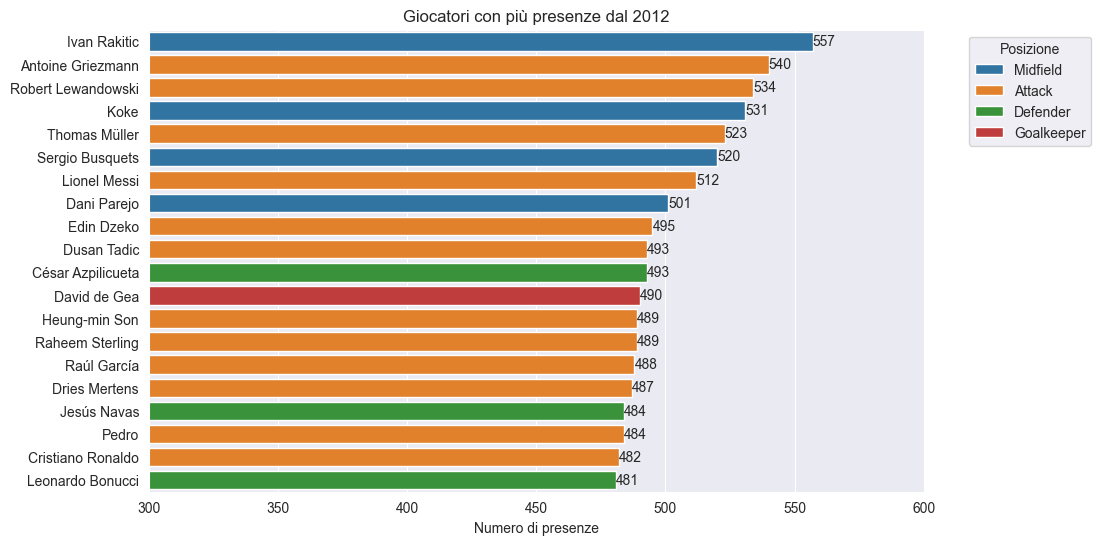

In [39]:
# giocatori con il maggior numero di presenze dal 2012

top20_players_app = appearances_df['player_id'].value_counts().head(20)
merged_df = pd.merge(top20_players_app, players_df, left_index=True, right_on='player_id')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=merged_df, y='name', x='count', hue='position')
    
for i, (value, name) in enumerate(zip(merged_df['count'], merged_df['name'])):
    ax.text(value, i, f"{value}", ha="left", va='center')

plt.title('Giocatori con più presenze dal 2012')
plt.xlabel('Numero di presenze')
plt.ylabel('')
plt.legend(title='Posizione', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(300, 600)
plt.show()

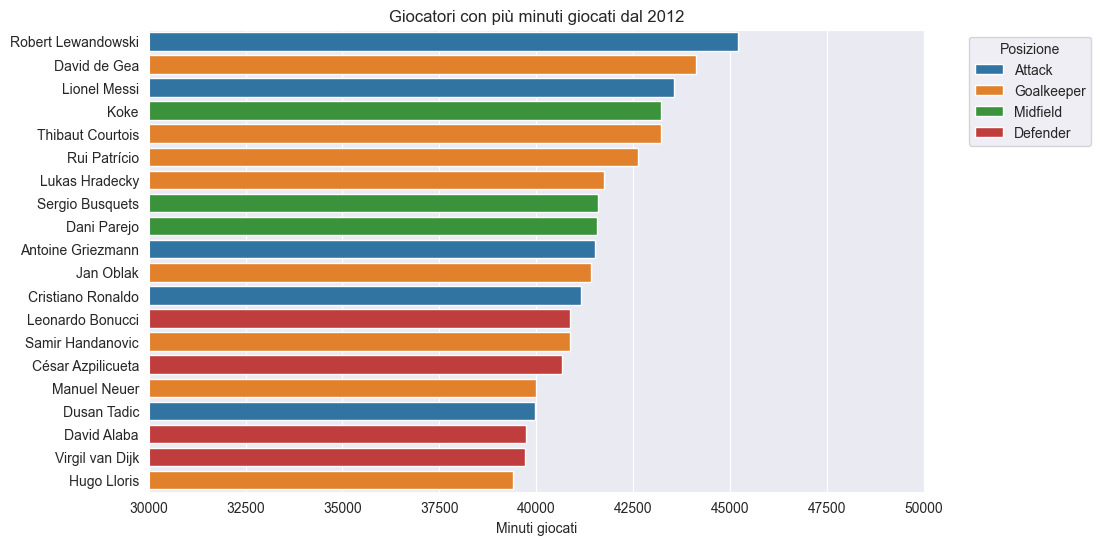

In [40]:
# giocatori con più minuti giocati dal 2012

total_minutes = appearances_df.groupby('player_id')['minutes_played'].sum()

merged_data = pd.merge(total_minutes, players_df, left_index=True, right_on='player_id')

top20_players_minutes = merged_data.nlargest(20, 'minutes_played')

plt.figure(figsize=(10, 6))
sns.barplot(data=top20_players_minutes, x='minutes_played', y='name', hue='position')

plt.title('Giocatori con più minuti giocati dal 2012')
plt.ylabel('')
plt.xlabel('Minuti giocati')
plt.legend(title='Posizione', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(30000, 50000)
plt.show()

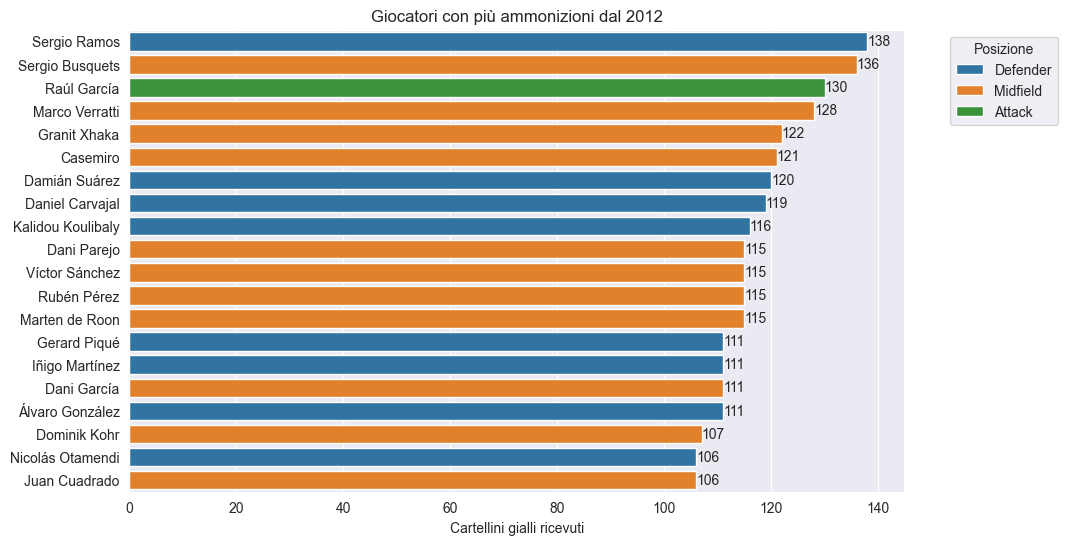

In [41]:
# giocatori con il maggior numero di ammonizioni dal 2012

total_yellows = appearances_df.groupby('player_id')['yellow_cards'].sum()

merged_data = pd.merge(total_yellows, players_df, left_index=True, right_on='player_id')

top20_players_yellows = merged_data.nlargest(20, 'yellow_cards')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top20_players_yellows, x='yellow_cards', y='name', hue='position')

for i, (value, name) in enumerate(zip(top20_players_yellows['yellow_cards'], top20_players_yellows['name'])):
    ax.text(value, i, f"{value}", ha="left", va='center')

plt.title('Giocatori con più ammonizioni dal 2012')
plt.ylabel('')
plt.xlabel('Cartellini gialli ricevuti')
plt.legend(title='Posizione', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

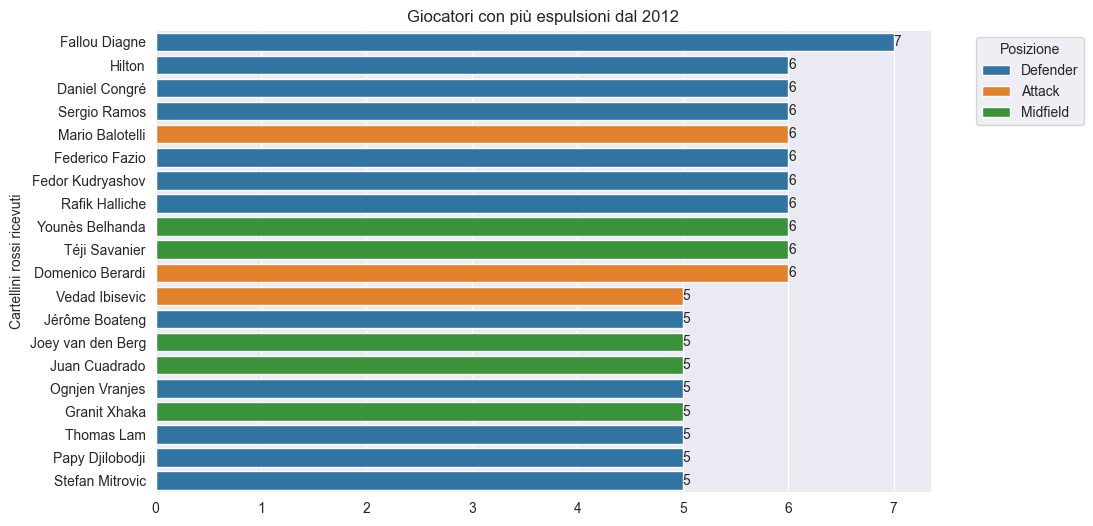

In [42]:
# giocatori con il maggior numero di espulsioni dal 2012

total_reds = appearances_df.groupby('player_id')['red_cards'].sum()

merged_data = pd.merge(total_reds, players_df, left_index=True, right_on='player_id')

top20_players_reds = merged_data.nlargest(20, 'red_cards')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top20_players_reds, x='red_cards', y='name', hue='position')

for i, (value, name) in enumerate(zip(top20_players_reds['red_cards'], top20_players_reds['name'])):
    ax.text(value, i, f"{value}", ha="left", va='center')

plt.title('Giocatori con più espulsioni dal 2012')
plt.xlabel('')
plt.ylabel('Cartellini rossi ricevuti')
plt.legend(title='Posizione', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

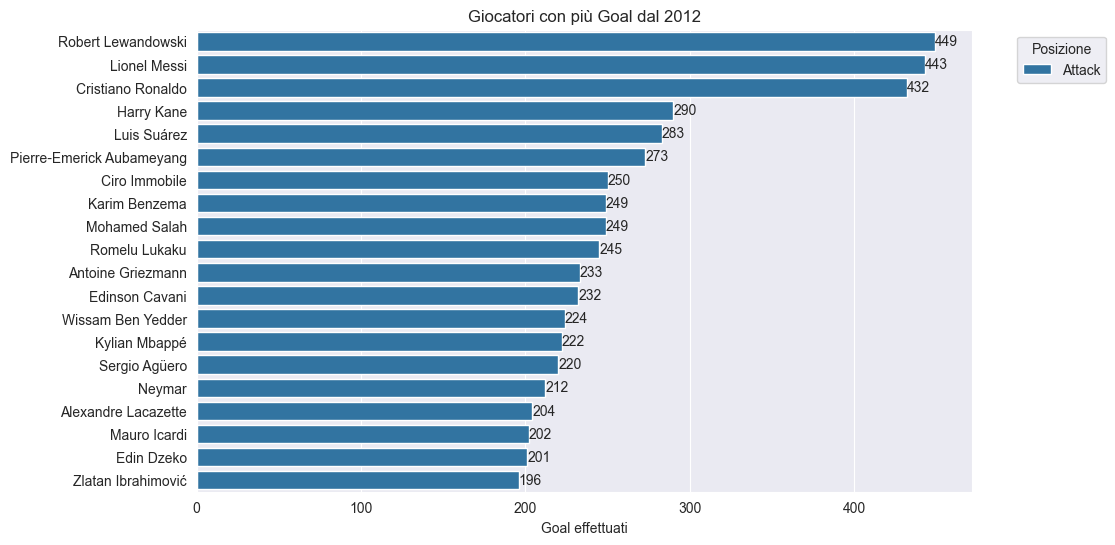

In [43]:
# giocatori con più goal segnati dal 2012

total_goals = appearances_df.groupby('player_id')['goals'].sum()

merged_data = pd.merge(total_goals, players_df, left_index=True, right_on='player_id')

top20_players_goals = merged_data.nlargest(20, 'goals')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top20_players_goals, x='goals', y='name', hue='position')

for i, (value, name) in enumerate(zip(top20_players_goals['goals'], top20_players_goals['name'])):
    ax.text(value, i, f"{value}", ha="left", va='center')

plt.title('Giocatori con più Goal dal 2012')
plt.ylabel('')
plt.xlabel('Goal effettuati')
plt.legend(title='Posizione', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

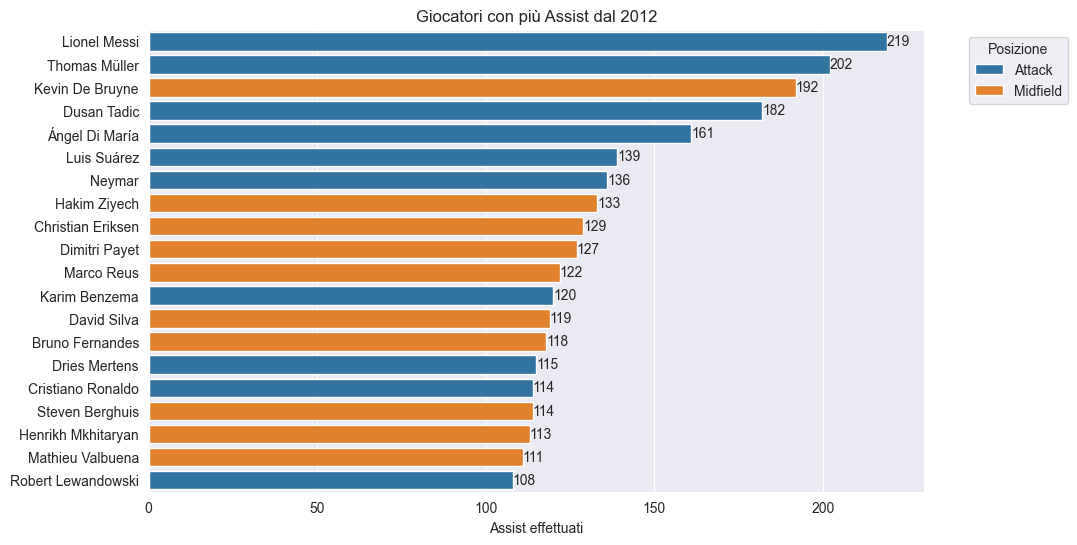

In [44]:
# giocatori con più assist effettuati dal 2012

total_assists = appearances_df.groupby('player_id')['assists'].sum()

merged_data = pd.merge(total_assists, players_df, left_index=True, right_on='player_id')

top20_players_assists = merged_data.nlargest(20, 'assists')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top20_players_assists, x='assists', y='name', hue='position')

for i, (value, name) in enumerate(zip(top20_players_assists['assists'], top20_players_assists['name'])):
    ax.text(value, i, f"{value}", ha="left", va='center')

plt.title('Giocatori con più Assist dal 2012')
plt.ylabel('')
plt.xlabel('Assist effettuati')
plt.legend(title='Posizione', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

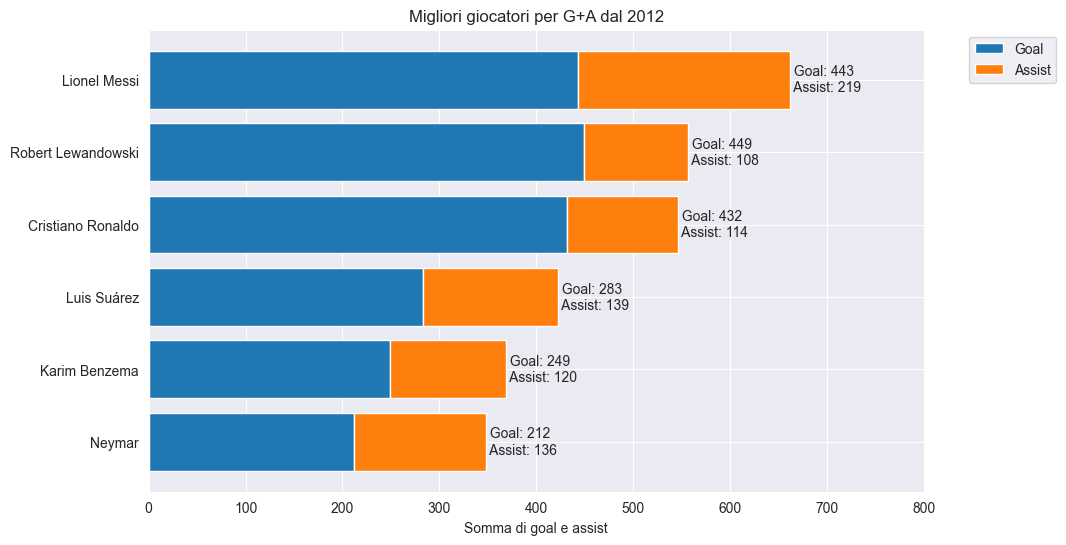

In [45]:
# migliori giocatori per goal e assist (dal 2012)

df_assists = pd.DataFrame(top20_players_assists)
df_goals = pd.DataFrame(top20_players_goals)

df_merged = pd.merge(df_assists, df_goals, on='name')
df_merged['total'] = df_merged['assists'] + df_merged['goals']
df_merged = df_merged.sort_values(by='total')

# Plot per i goal
plt.figure(figsize=(10, 6))
plt.barh(df_merged['name'], df_merged['goals'], label='Goal')
# Plot per gli assist
plt.barh(df_merged['name'], df_merged['assists'], left=df_merged['goals'], label='Assist')

for i, (goals, assists, name) in enumerate(zip(df_merged['goals'], df_merged['assists'], df_merged['name'])):
    plt.text(goals + assists, i, f' Goal: {goals}\n Assist: {assists}', va='center')

plt.title('Migliori giocatori per G+A dal 2012')
plt.xlabel('Somma di goal e assist')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0,800)
plt.show()

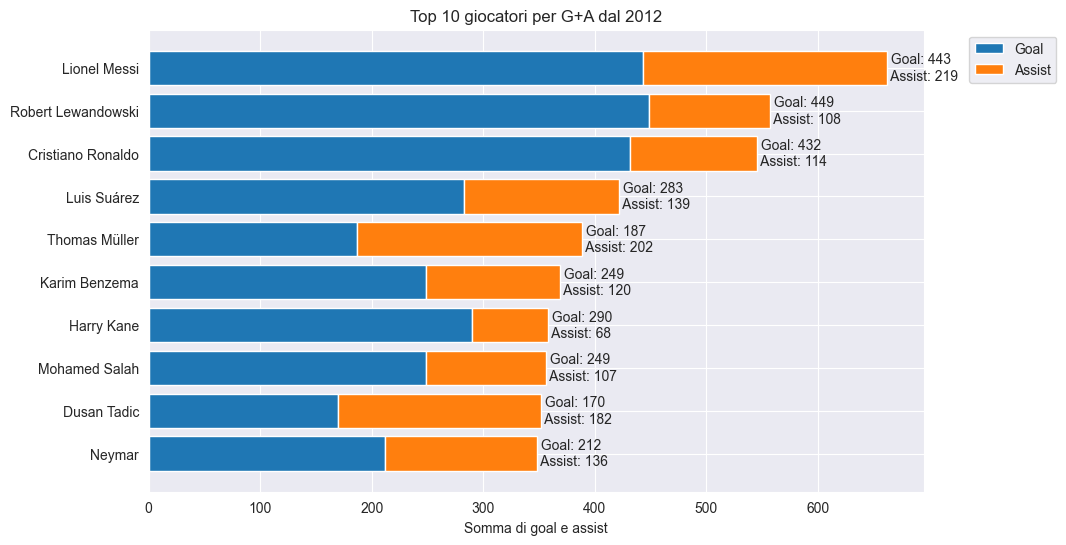

In [46]:
# migliori giocatori per goal e assist dal 2012

total_goals_assists = appearances_df.groupby('player_id')[['goals', 'assists']].sum()

merged_data = pd.merge(total_goals_assists, players_df, left_index=True, right_on='player_id')
merged_data['total_goals_assists'] = merged_data['goals'] + merged_data['assists']
top_players = merged_data.nlargest(10, 'total_goals_assists').sort_values(by='total_goals_assists')

plt.figure(figsize=(10, 6))
plt.barh(top_players['name'], top_players['goals'], label='Goal')
plt.barh(top_players['name'], top_players['assists'], left=top_players['goals'], label='Assist')

for i, (goals, assists, name) in enumerate(zip(top_players['goals'], top_players['assists'], top_players['name'])):
    plt.text(goals + assists, i, f' Goal: {goals}\n Assist: {assists}', va='center')

plt.title('Top 10 giocatori per G+A dal 2012')
plt.xlabel('Somma di goal e assist')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [47]:
# top 5 campionati e stagione 2023/2024
top_leagues = ['IT1', 'ES1', 'GB1', 'L1', 'FR1']

current_players = players_df.query('last_season == 2023 and current_club_domestic_competition_id in @top_leagues')
current_appearances = appearances_df.query('date > "2023-07-31 00:00:00"')

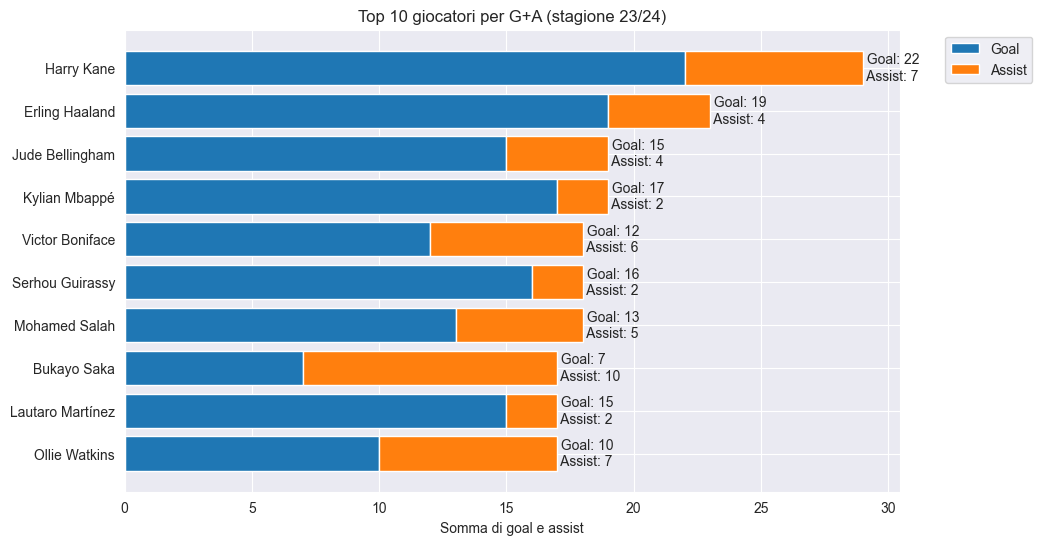

In [48]:
# migliori giocatori per goal e assist nella stagione corrente (23/24)

total_goals_assists = current_appearances.groupby('player_id')[['goals', 'assists']].sum()

merged_data = pd.merge(total_goals_assists, current_players, left_index=True, right_on='player_id')
merged_data['total_goals_assists'] = merged_data['goals'] + merged_data['assists']
top_players = merged_data.nlargest(10, 'total_goals_assists').sort_values(by='total_goals_assists')

plt.figure(figsize=(10, 6))
plt.barh(top_players['name'], top_players['goals'], label='Goal')
plt.barh(top_players['name'], top_players['assists'], left=top_players['goals'], label='Assist')

for i, (goals, assists, name) in enumerate(zip(top_players['goals'], top_players['assists'], top_players['name'])):
    plt.text(goals + assists, i, f' Goal: {goals}\n Assist: {assists}', va='center')

plt.title('Top 10 giocatori per G+A (stagione 23/24)')
plt.xlabel('Somma di goal e assist')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

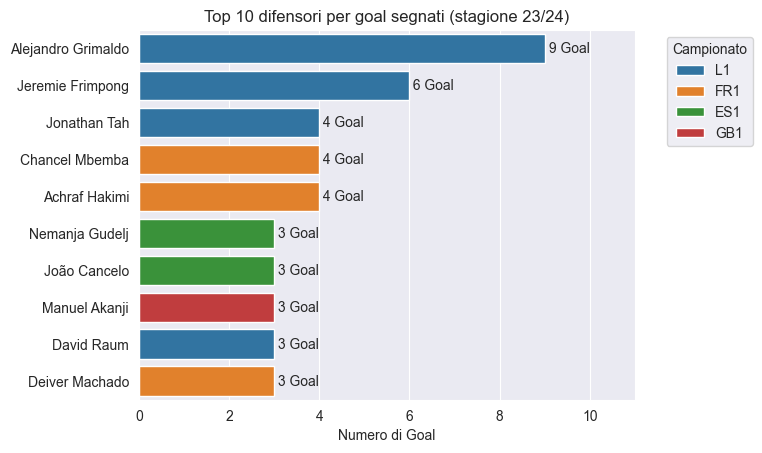

In [49]:
# difensori con più goal segnati (stagione 23/24)

defenders = players_df.query('position == "Defender" and current_club_domestic_competition_id in @top_leagues')
defenders_goals = current_appearances.groupby('player_id')['goals'].sum()
merged_data = pd.merge(defenders_goals, defenders, left_index=True, right_on='player_id')
top_defenders = merged_data.nlargest(10, 'goals')


sns.barplot(data=top_defenders, x='goals', y='name', hue='current_club_domestic_competition_id')

for i, (goal, name) in enumerate(zip(top_defenders['goals'], top_defenders['name'])):
    plt.text(goal, i, f' {goal} Goal', ha='left', va='center')

plt.title('Top 10 difensori per goal segnati (stagione 23/24)')
plt.xlabel('Numero di Goal')
plt.ylabel('')
plt.legend(title='Campionato', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0,11)
plt.show()

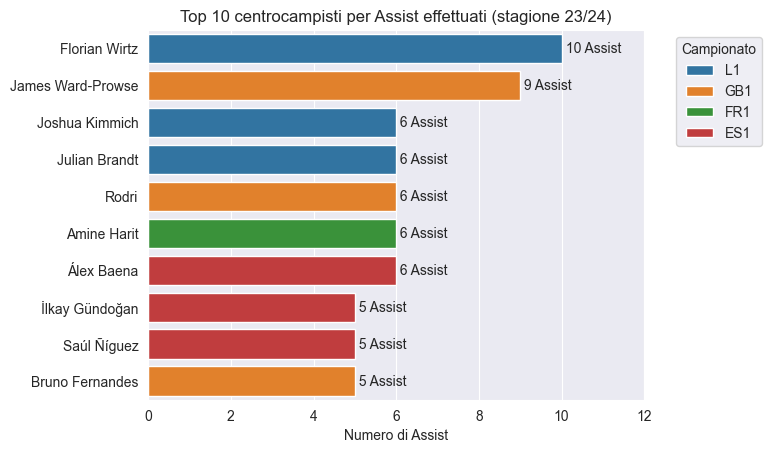

In [50]:
midfielders = players_df.query('position == "Midfield" and current_club_domestic_competition_id in @top_leagues')
midfielders_assists = current_appearances.groupby('player_id')['assists'].sum()
merged_data = pd.merge(midfielders_assists, midfielders, left_index=True, right_on='player_id')
top_midfielders = merged_data.nlargest(10, 'assists')


sns.barplot(data=top_midfielders, x='assists', y='name', hue='current_club_domestic_competition_id')

for i, (goal, name) in enumerate(zip(top_midfielders['assists'], top_midfielders['name'])):
    plt.text(goal, i, f' {goal} Assist', ha='left', va='center')

plt.title('Top 10 centrocampisti per Assist effettuati (stagione 23/24)')
plt.xlabel('Numero di Assist')
plt.ylabel('')
plt.legend(title='Campionato', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0,12)
plt.show()